## Installing Kaggle and Downloading Ethereum Fraud Detection Dataset

The code `!pip install kaggle` will install the Kaggle API on the computer. TTo run the this cell you will need to provide the Kaggle user and password in json format in the same directory of this notebook. Please follow the tutorial available in the Further Reading section at the end of the Chapter. 
The code `!mkdir ~/.kaggle` will create a directory called `.kaggle` in the user's home directory, `!cp kaggle.json ~/.kaggle/` copy the `kaggle.json` file to the `.kaggle` directory and `!chmod 600 ~/.kaggle/kaggle.json` sets the permissions of the `kaggle.json` file to read-only. 

With `!kaggle datasets download vagifa/ethereum-frauddetection-dataset` download the Ethereum Fraud Detection Dataset from Kaggle and with `!unzip ethereum-frauddetection-dataset.zip` unzip it for use. 

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download vagifa/ethereum-frauddetection-dataset
!unzip ethereum-frauddetection-dataset

## Imports

Import the necessary libraries.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Read the Dataset

Define a list of columns to be used and read the dataset from the file `transaction_dataset.csv` downloaded from Kaggle. 

In [3]:
columns=['FLAG', 'Avg min between sent tnx','Avg min between received tnx','Sent tnx', 'Received Tnx', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'avg val received','avg val sent', 'avg value sent to contract','total transactions (including tnx to create contract','total Ether sent', 'total ether received',
       'total ether sent contracts', ' Total ERC20 tnxs', ' ERC20 total Ether received']
df= pd.read_csv ("transaction_dataset.csv", usecols=columns)
df.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Sent tnx,Received Tnx,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,Total ERC20 tnxs,ERC20 total Ether received
0,0,844.26,1093.71,721,89,40,118,6.589513,1.200681,0.0,810,865.691093,586.466675,0.0,265.0,3.558854e+07
1,0,12709.07,2958.44,94,8,5,14,0.385685,0.032844,0.0,102,3.087297,3.085478,0.0,8.0,4.034283e+02
2,0,246194.54,2434.02,2,10,10,2,0.358906,1.794308,0.0,12,3.588616,3.589057,0.0,8.0,5.215121e+02
3,0,10219.60,15785.09,25,9,7,13,99.488840,70.001834,0.0,34,1750.045862,895.399559,0.0,14.0,1.711105e+04
4,0,36.61,10707.77,4598,20,7,19,2.671095,0.022688,0.0,4619,104.318883,53.421897,0.0,42.0,1.628297e+05


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 16 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Sent tnx                                              9841 non-null   int64  
 4   Received Tnx                                          9841 non-null   int64  
 5   Unique Received From Addresses                        9841 non-null   int64  
 6   Unique Sent To Addresses                              9841 non-null   int64  
 7   avg val received                                      9841 non-null   float64
 8   avg val sent                                          9841

## Dropping Null Values

Drop all rows with null values in the specified columns.

In [5]:
df.dropna(subset=['Avg min between sent tnx', 'Avg min between received tnx',
       'Sent tnx', 'Received Tnx', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'avg val received', 'avg val sent',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', ' Total ERC20 tnxs',
       ' ERC20 total Ether received'], inplace=True)

Select model and the parameters. 

The formula for class_weight is `total observations / (number of classes * observations in class)`, which will result in more weight to the less represented class. 

In [6]:
random_forest = RandomForestClassifier(random_state=42)  #, class_weight={1:3.34 ,0:0.59}

Divide the dataset in train and test

In [7]:
X = df.loc[:, df.columns != "FLAG"]
y= df[['FLAG']]

## Splitting Data

Split the data into training and testing sets. The `stratify` parameter ensures that the proportion of labels in the training and testing sets is the same as the proportion of labels in the original dataset. The `test_size` parameter is set to 0.33, which means that 33% of the data will be used for testing and the remaining 67% will be used for training. The `random_state` parameter is set to 42, which will ensure that the same split is used each time the code is run and then results are reproduceable. 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [9]:
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(6038, 15)
(6038, 1)
(2974, 15)
(2974, 1)


Train

## Training the Random Forest Model
Train the random forest model using the training data. 

In [ ]:
random_forest.fit(X_train, y_train)

## Evaluating the Random Forest Model

Use the trained random forest model to make predictions on the test data and calculate the accuracy of the model. This is a measure of how well the model is performing on the test data on classification tasks. 

In [11]:
y_test_pred = random_forest.predict(X_test)
print('Accuracy:', accuracy_score(y_test_pred,y_test))

Accuracy: 0.9835238735709482


Print a `classification report` for the random forest model. This report will provide a detailed breakdown of the model's performance on the test data, including precision, recall, and f1-score for each class. This will help to identify any areas where the model is performing poorly, and can be used to inform further model tuning. This is a better report for imbalanced datasets.

In [12]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2561
           1       0.91      0.98      0.94       413

    accuracy                           0.98      2974
   macro avg       0.95      0.98      0.97      2974
weighted avg       0.98      0.98      0.98      2974



Generate a confusion matrix for the random forest model. This matrix will provide a visual representation of the model's performance, showing the number of true positives, true negatives, false positives, and false negatives. 

<AxesSubplot:>

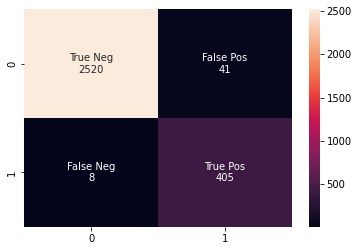

In [13]:
conf_mat=confusion_matrix(y_test_pred,y_test) 
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                conf_mat.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt="")